# Introduction to Data Distributions with Scipy Module

## What's Covered
1. Understanding the Role of a Data Analyst
2. What is a Data Distribution?
3. Key characteristics of a Data Distributions
4. Types of Distributions
5. Why Study Data Distributions?
6. Importing Libraries and Creating Helper Functions
7. Discrete Distribution
- Bernoulli Distribution
- Binomial Distribution
- Poisson Distribution
- Multinomial Distribution
- Conclusion
8. Continuous Distribution
- Uniform Distribution
- Gaussian (Normal) Distribution and 68-95-99.7% Rule
- Exponential Distribution
- Log Normal Distribution
- Pareto (Power Law) Distribution
- Conclusion
9. Case Study
- Scenario: Setting Up a Garment Store
- Import the Libraries and Load the Data
- Domain Knowledge
- Task to Solve
10. Verify the Type of Distribution - QQ Plot
11. Feature Engineering
- Feature Scaling (Rescaling)
- - Min-Max Scaling (Normalization)
- - z-transformation (Standardization)
- Data Transformation
- - Log Transformation
- - Box Cox Transformation

## Understanding the Role of a Data Analyst
1. No matter in what format the data comes (for eg: .csv, .xlsx, MySQL, PostgreSQL, MongoDB, Oracle, .JSON, .XML, .TXT, .JPG, .PNG, Google Sheet, AWS Server, GCP Server, Azure, etc..) you should be able to EXTRACT the data and LOAD in the tool which you are most comfortable with.
2. You should be able to perform TRANSFORMATION of data so that it is ready for analysis.
3. You should be able to perform DATA ANALYSIS using the skillset which you are most comfortable with.
4. You as a DATA ANALYST should be able to generate ACTIONABLE INSIGHTS from the given data so that the client/businesses can take a DATA DRIVEN DECISION.

### What is a Data Distribution?
A data distribution refers to the way in which data values are spread or distributed across a dataset. It provides information about the possible values a variable can take and how frequently each value occurs. Understanding the distribution of data is fundamental in statistics and data analysis, as it forms the basis for making inferences, building models, and drawing conclusions about a population based on a sample.

### Key characteristics of a Data Distributions
1. Cardinality(nunique) and Unique (For Discrete Columns)
2. Count, Min and Max (For Numerical Columns)
3. Central Tendency: This indicates the "center" of the data. Common measures of central tendency include the mean (average), median (middle value), and mode (most frequently occurring value).
4. Dispersion or Spread: This describes how spread out the data points are. Measures of dispersion include range, variance, and standard deviation.
5. Shape: This refers to the overall pattern or form of the distribution. Common shapes include normal (bell-shaped), skewed (lopsided), and uniform (evenly distributed).

### Types of Distributions

There are two broad categories of Data Distributions:

1. Discrete Distribution (Categorical or Discrete Numerical Columns)
2. Continuous Distribution (Continuos/Real Numerical Feature)
Based on key characteristics of data distribution, we can further classify them into following types:

1. Discrete Distribution (Categorical or Discrete Numerical Columns)
- Bernoulli Distribution
- Binomial Distribution
- Poisson Distribution
- Multinomial Distribution
2. Continuous Distribution (Continuos/Real Numerical Feature)
- Uniform Distribution
- Gaussian (Normal) Distribution
- Exponential Distribution
- Log Normal Distribution
- Pareto (Power Law) Distribution
We will learn the PMFs and PDFs for the above mentioned distributions. The main distinction between PMFs and PDFs is that PMFs give probabilities associated with specific points, while PDFs describe probabilities over intervals.

### Why Study Data Distributions?

Understanding the distribution of data is crucial in a wide range of fields, including statistics, data science, economics, finance, healthcare, and more. It informs decision-making, helps in selecting appropriate statistical tests or models, and provides insights into the underlying patterns and characteristics of a dataset. Following are the benefits of studying data distributions:

1. Outlier and Missing Values - Outliers are data points that are significantly different from the rest of the data. Knowledge of Data Distribution helps perform a better outlier and missing value treatment.
2. Advance Data Analysis - Knowledge of data distributions and their PMFs/PDFs can help us with better insight generation from the given data and take data driven decisions.
3. Inferential Statistics - Knowledge of Distribution can help us select the appropriate Statistical Tests.
4. ML and DL - It also helps us identify appropriate Algorithms for Data Modelling in ML and DL.

Importing Libraries and Creating Helper Functions

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy import stats

In [3]:
# Creating the helper functions for non visual analysis
def discrete_non_viz_analysis(data):
    '''
    This function performs a complete statistical 
    analysis of discrete data (categorical and numerical).
    '''
    series = pd.Series(data)
    print(series.agg(['count', 'nunique', 'unique']))
    print('Value Counts: \n', series.value_counts())
    print()


def continuous_non_viz_analysis(data):
    '''
    This function performs a complete statistical 
    analysis of continuous numerical data.
    '''
    series = pd.Series(data)
    print(series.agg(['count', 'min', 'max', 'mean', 'median', 'var', 'std', 'skew', 'kurt']).round(2))
    print()

In [5]:
# Creating the helper functions for visual analysis
def discrete_viz_analysis(data):
    '''
    This function performs a complete visual 
    analysis of discrete data (categorical and numerical).
    '''
    fig, ax = plt.subplots(figsize=(5, 3), constrained_layout=True)
    fig.suptitle("Discrete Distribution Plot")
    
    ax.set_title("Count Plot")
    sns.countplot(x=data, ax=ax)
    
    plt.xticks(rotation=45)
    plt.show()



def continuous_viz_analysis(data):
    '''
    This function performs a complete visual 
    analysis of continuous numerical data.
    '''

    fig, axes = plt.subplots(1, 3, figsize=(8, 3), constrained_layout=True)
    fig.suptitle("Continuous Distribution Plot")
    
    axes[0].set_title("Histogram Plot")
    sns.histplot(data, ax=axes[0])
    
    axes[1].set_title("KDE Plot")
    sns.kdeplot(data, fill=True, ax=axes[1])

    axes[2].set_title("Box Plot")
    sns.boxplot(data, ax=axes[2])

    plt.show()

#### Discrete Distributions

Bernoulli Distribution
The Bernoulli distribution models a random experiment with two possible outcomes, often labeled as "success" and "failure." It is characterized by a single parameter, p, which represents the probability of success.
For eg:

- Loan Approval - Suppose a bank is considering a loan application. The outcome can be either "Approved" (success) or "Rejected" (failure) based on certain criteria. Let's say the probability of loan approval (p) is 0.8.
> What will be the probabilily of rejection?
  Ans: ___________

- Student Pass/Fail Outcome in a final exam - Suppose a university is considering a pass/fail criterion for a final exam. The outcome for each student can be either "Pass" (success) or "Fail" (failure) based on a predefined threshold. Probability of a student passing the exam is 0.7 (p).
> What is the probability of student failing the   exam?
 Ans: ___________

If data follows bernoulli distribution, we represent it like this:
 x ~ B(1,p)
Probability Mass Function
 f(x)={ p if x=1, 1-p if x=0}
 

In [6]:
def bernoulli_distribution(p,size):
     # Define the number of trials (n) and the probability of success (p)
    return np.random.binomial(n=1, p=p, size=size)

count         100
nunique         2
unique     [0, 1]
dtype: object
Value Counts: 
 0    69
1    31
Name: count, dtype: int64



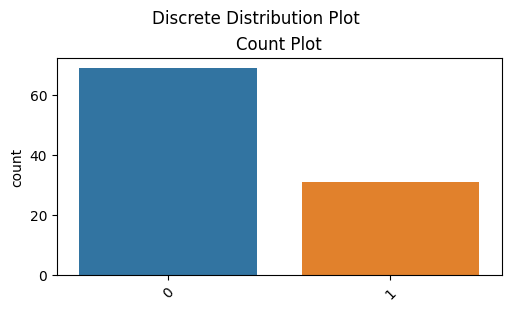

In [7]:
bernoulli_dist = bernoulli_distribution(p=0.30,size=100)

discrete_non_viz_analysis(data=bernoulli_dist)

discrete_viz_analysis(data=bernoulli_dist)

count       10000
nunique         2
unique     [0, 1]
dtype: object
Value Counts: 
 0    6909
1    3091
Name: count, dtype: int64



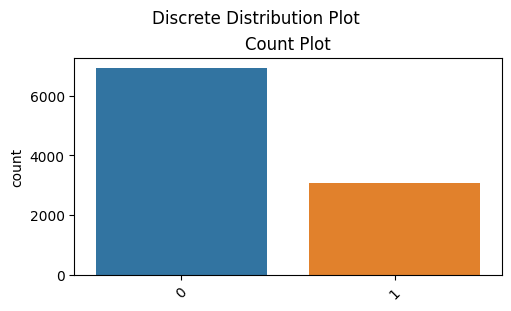

F(k=0): 0.7000000000000002
F(k=1): 0.3


In [9]:
# Using scipy.stats to generate the bernoulli distribution
prob_success = 0.30

var = stats.bernoulli.rvs(p=prob_success, size=10000)
discrete_non_viz_analysis(data=var)
discrete_viz_analysis(data=var)

# calculating pmf
print('F(k=0):', stats.bernoulli.pmf(k=0, p=prob_success))
print('F(k=1):', stats.bernoulli.pmf(k=1, p=prob_success))

### Binomial Distribution

The binomial distribution models the number of successes (x) in a fixed number of independent Bernoulli trials (n), each with the same probability of success (p). For eg:

1. Number of Loan Approvals in a day - Assuming the bank receives 20 loan applications in a day (i.e. n), and each application has an independent probability of approval of p = 0.8.
What is the probability of approving exactly 15 loans?
Ans: _________

2. Success Rate in a Tutoring Program - In a tutoring program, 50 students (i.e. n) are enrolled, and each student has an independent probability of success (p=0.7).
What is the probability of exactly 30 students succeeding?
Ans: __________

If data follows binomial distribution, we represent it like this:
 X~B(n,p)

Probability Mass Function
 f(x)=(n,x)(p)^x(1-p)^n-x
 (n,x)= n!/x!(n-x)!

here,
 


In [11]:
def binomial_distribution(n,p,size):
    # Define the number of trials (n) and the probability of success (p)
    return np.random.binomial(n=n, p=p, size=size)

count                            10000
nunique                              9
unique     [3, 4, 1, 2, 5, 0, 8, 6, 7]
dtype: object
Value Counts: 
 3    2656
2    2422
4    1920
1    1205
5    1046
6     383
0     267
7      85
8      16
Name: count, dtype: int64



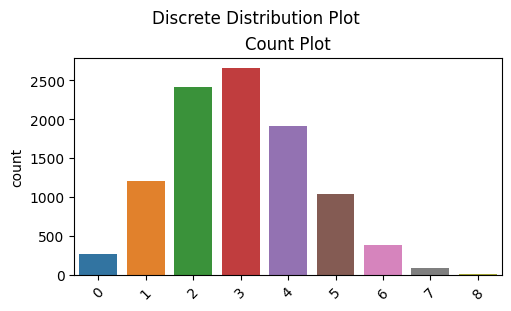

In [12]:
binomial_dist = binomial_distribution(n=10, p=0.30, size=10000)
discrete_non_viz_analysis(data=binomial_dist)
discrete_viz_analysis(data=binomial_dist)

count                               10000
nunique                                10
unique     [4, 5, 1, 2, 3, 0, 6, 8, 7, 9]
dtype: object
Value Counts: 
 3    2671
2    2333
4    2040
1    1214
5    1006
6     338
0     292
7      93
8      12
9       1
Name: count, dtype: int64



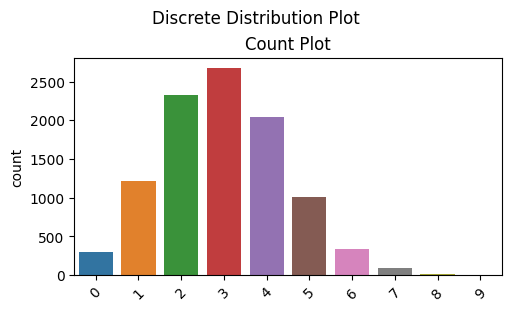

probability of 0 success out of 10 trials: 0.0282475249
Probability of 1 success out of 10 trials: 0.12106082099999989
Probability of 2 successes out of 10 trials: 0.2334744405000001
Probability of <=2 success out of 10 trials: 0.3827827863999998


In [15]:
# using scipy.stats to generate the binomial distribution
n_trials = 10
prob_success = 0.30
var = stats.binom.rvs(n=n_trials, p=prob_success, size=10000)
discrete_non_viz_analysis(data=var)
discrete_viz_analysis(data=var)

# computing pmf and cdf
print('probability of 0 success out of 10 trials:', stats.binom.pmf(k=0, n=n_trials, p=prob_success))
print("Probability of 1 success out of 10 trials:", stats.binom.pmf(k=1, n=n_trials, p=prob_success))
print("Probability of 2 successes out of 10 trials:", stats.binom.pmf(k=2, n=n_trials, p=prob_success))
print("Probability of <=2 success out of 10 trials:", stats.binom.cdf(k=2, n=n_trials, p=prob_success))